In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0


Using TensorFlow backend.


Keras 		2.0.3


In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

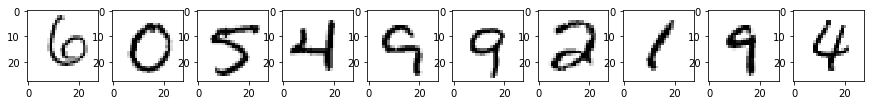

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [7]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=500, epochs=10, verbose=1,
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 0s - loss: 1.1687 - acc: 0.7100 - val_loss: 0.6501 - val_acc: 0.8579
Epoch 2/10
55000/55000 [==============================] - 0s - loss: 0.5654 - acc: 0.8641 - val_loss: 0.4656 - val_acc: 0.8889
Epoch 3/10
55000/55000 [==============================] - 0s - loss: 0.4512 - acc: 0.8851 - val_loss: 0.3969 - val_acc: 0.9005
Epoch 4/10
55000/55000 [==============================] - 0s - loss: 0.3989 - acc: 0.8953 - val_loss: 0.3615 - val_acc: 0.9054
Epoch 5/10
55000/55000 [==============================] - 0s - loss: 0.3683 - acc: 0.9019 - val_loss: 0.3386 - val_acc: 0.9101
Epoch 6/10
55000/55000 [==============================] - 0s - loss: 0.3478 - acc: 0.9067 - val_loss: 0.3233 - val_acc: 0.9118
Epoch 7/10
55000/55000 [==============================] - 0s - loss: 0.3329 - acc: 0.9103 - val_loss: 0.3133 - val_acc: 0.9135
Epoch 8/10
55000/55000 [==============================] - 0s 

In [10]:
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.292889834046
Test accuracy: 0.9186


In [11]:
# test item #100 is a six
pixels = mnist.test.images[100]
result = model.predict_on_batch(np.array([pixels]))
dict(zip(range(10), result[0]))

{0: 0.0038107741,
 1: 0.0036255594,
 2: 0.068874724,
 3: 0.0040754587,
 4: 0.0050108018,
 5: 0.00063145149,
 6: 0.90202528,
 7: 0.00082349818,
 8: 0.00834422,
 9: 0.0027782677}

In [12]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.49

    plt.barh(ind,result, width, color='orange', edgecolor='k', hatch="/")
    plt.barh(ind+width,truth,width, color='g', edgecolor='k')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

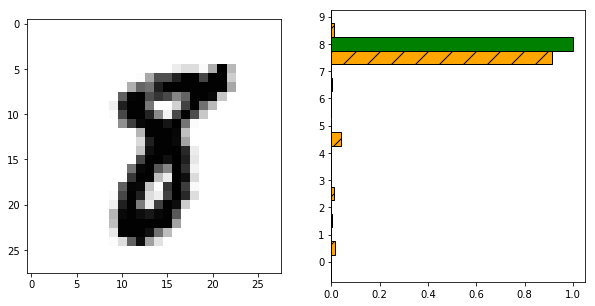

In [13]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)